In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, LSTM, Dropout, MaxPool2D, Activation, Flatten
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import h5py


In [0]:
data = np.load("/content/drive/My Drive/Data Set/dataset.npz")

In [0]:
data_train = data['arr_0']
label_train = data['arr_1']
data_test = data['arr_2']
label_test = data['arr_3']

# np.random.seed(34)
# np.random.shuffle(data_train)
# np.random.shuffle(label_test)


# X = data_train[0:100,:,:]
# y = label_train[0:100]
new_x = np.expand_dims(data_train, axis=3)
print(new_x.shape)

#preparing output data

label_y = np.expand_dims(label_train, axis=1)
enc = OneHotEncoder()
enc.fit(label_y)
new_y = enc.transform(label_y).toarray()
print(new_y.shape)



## Generating new Data using random

# rng = np.random.default_rng(seed=40)
# new_x = rng.choice(data_train, 600)
# new_x = np.expand_dims(new_x, axis=3)
# print("Data from traning....")
# new_x.shape


(78200, 32, 32, 1)
(78200, 46)


In [0]:
# n_label = np.expand_dims(label_train, axis=1)
# # print(n_label)
# new_kk = np.append(data_train, n_label, axis=2)
# new_kk.shape


In [0]:


def create_model():
  model = Sequential()
  model.add(Conv2D(64, kernel_size=3, padding="same", activation='relu', input_shape=(32,32,1)))
  model.add(Conv2D(32, padding="same", kernel_size=2, activation='relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(46, activation='softmax'))
  return model







In [0]:
model = create_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        8224      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 46)                376878    
Total params: 385,742
Trainable params: 385,742
Non-trainable params: 0
________________________________________________

In [0]:
model.fit(new_x, new_y, epochs=4, batch_size=100, verbose=1)
# print(X.shape)

Epoch 1/4
782/782 [==============================] - 187s 239ms/step - loss: 0.9851 - accuracy: 0.8156
Epoch 2/4
782/782 [==============================] - 187s 239ms/step - loss: 0.2481 - accuracy: 0.9253
Epoch 3/4
782/782 [==============================] - 191s 245ms/step - loss: 0.1828 - accuracy: 0.9445
Epoch 4/4
782/782 [==============================] - 187s 239ms/step - loss: 0.1387 - accuracy: 0.9558


In [0]:
tt_train = data_test[3000:3100,:,:]
tt_train = np.expand_dims(tt_train, axis=3)
tt_train.shape

result = model.predict(tt_train)

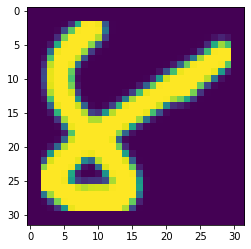

In [0]:
x = data_test[3000,:,:]
# print(x.dtype)
ccc = x.astype("float32") * 255
plt.imshow(ccc)
plt.show()

In [0]:
# cata = [i for i in range(0,46)]
# l_result = dict(zip(cata, cata))
res = np.argmax(result, axis=1)
print([i+1 for i in res])
print(label_test[3000:3100])


[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 29, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 12, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41]


In [0]:
#prepare Testing data
x_test = np.expand_dims(data_test, axis=3)
y_test = np.expand_dims(label_test, axis=1)

enc1 = OneHotEncoder()
enc1.fit(y_test)
y_test = enc1.transform(y_test).toarray()


result = model.evaluate(x_test, y_test, batch_size=120)
print(result)

115/115 [==============================] - 7s 62ms/step - loss: 0.2097 - accuracy: 0.9428
[0.20971420407295227, 0.9428260922431946]


In [0]:
r_kha= cv2.imread("/content/drive/My Drive/Data Set/r_kha.png")
# kha.shape
kha_32 = cv2.resize(r_kha, (32,32))
k_gray = cv2.cvtColor(kha_32, cv2.COLOR_BGR2GRAY)
k_gray = k_gray.astype(np.float32) / 255

new_k = 255 * k_gray
new_k = new_k.astype(np.uint8)

new_k = np.expand_dims(new_k, axis=2)
new_k = np.expand_dims(new_k, axis=0)
new_k.shape

(1, 32, 32, 1)

In [0]:
result = model.predict(new_k)
aaa = np.argmax(result)
print(aaa)
print(result)

5
[[0.01361321 0.01474762 0.02662008 0.03358022 0.01900312 0.05015089
  0.03351942 0.0222077  0.02197923 0.02281881 0.01317115 0.01912225
  0.01815574 0.03559048 0.0306079  0.01516538 0.03163676 0.02266014
  0.02215047 0.02379479 0.03710931 0.02900336 0.01647825 0.0131467
  0.01890858 0.02557321 0.02620881 0.01157352 0.01695974 0.01442065
  0.03283546 0.01508141 0.00746293 0.01831875 0.03440929 0.0228332
  0.01703442 0.02646711 0.01228994 0.00720987 0.01132543 0.01281688
  0.01347868 0.02111515 0.0230978  0.02454618]]


In [0]:
model_json = model.to_json()
with open("/content/drive/My Drive/Data Set/devnagari_model_94acc/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Data Set/devnagari_model_94acc/model_weights.h5")
print("Saved model to disk")

Saved model to disk


# New Section